# Research of advertisements for the sale of apartments

Based on the Yandex real estate service data, it is necessary to build an automated system that will determine the market value of real estate in St. Petersburg and neighboring settlements. The purpose of this project is to set the parameters. This will allow in the future to build an automated system: it will track anomalies and fraudulent activity.

**Initial data:**

Yandex Real Estate service data is an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data (distance to the center, airport, nearest park and reservoir).

**Decision progress:**
- Download and preview data.
- Data preprocessing.
- Creation of additional features based on the initial data.
- Exploratory data analysis.
- General conclusion.

**Objective of the project:**

Make an exploratory analysis of the data, conduct a pre-processing, determine the key factors affecting the price of real estate.

## Examining data from a file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set (font_scale=1.2)

In [2]:
sale_real_estate = pd.read_csv('C:\\Users\\Vadim\\Documents\\Datasets\\real_estate_data.csv')

In [3]:
sale_real_estate.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


**Conclusion:**

The data is stuck together in one column, which makes it impossible to find out preliminary information about the data. This happened because of the delimiters in the csv format.

## Data preprocessing

In [4]:
sale_real_estate = pd.read_csv('C:\\Users\\Vadim\\Documents\\Datasets\\real_estate_data.csv', sep='\t')

In [5]:
sale_real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
sale_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

There are gaps in the data, in the column names there are values with different case types. Let's bring the column names to the standard form:

In [7]:
sale_real_estate = sale_real_estate.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [8]:
sale_real_estate.isna().sum().to_frame().style.background_gradient('cool')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


In some columns, the number of gaps is extremely high (`is_apartment` - 88%). The gaps could appear due to the actual lack of a data type. If the owner did not indicate the number of balconies, then most likely they do not actually exist. In another case, the owner could simply not indicate in the ad such parameters as the height of the ceilings, living area, kitchen area and the name of the settlement. Nothing can be done about these passes. Gaps in the data on the number of reservoirs, parks could have arisen due to incorrect operation of the automatic information collection system. We will fill in the gaps where possible.

The presence of gaps in the balcony column indicates that most likely there are no balconies in the living quarters. Let's fill them with zeros.

In [9]:
sale_real_estate['balcony'] = sale_real_estate['balcony'].fillna(0)

The gaps in the `floors_total` and `locality_name` columns are 0.0036% and 0.002% of the entire sample. We remove the gaps, since their number is small relative to the entire sample.

By the same principle, fill in the gaps in `is_apartment`

In [10]:
sale_real_estate['is_apartment'] = sale_real_estate['is_apartment'].fillna(0)

We will fill in on the basis of the cost of the apartment and the number of rooms in it. We will form a summary table of the median shares of the kitchen area from the entire apartment. First, we calculate the share of kitchen areas:

In [11]:
sale_real_estate['kitchen_area_fraction'] = sale_real_estate['kitchen_area'] / sale_real_estate['total_area']

Let's divide `last_price` into equal intervals by price ranges and form a table of median shares of the kitchen area from the apartment:

In [12]:
df_median_kitchen_area = sale_real_estate.pivot_table(index='rooms', columns=pd.qcut(
    sale_real_estate['last_price'], q=5), values='kitchen_area_fraction', aggfunc='median')

In [13]:
df_median_kitchen_area

last_price,"(12189.999, 3190000.0]","(3190000.0, 4104250.4]","(4104250.4, 5295000.0]","(5295000.0, 7585000.0]","(7585000.0, 763000000.0]"
rooms,,,,,
1,0.224248,0.250000,0.260870,0.265559,0.272277
2,0.145833,0.150820,0.159091,0.173670,0.187500
3,0.111876,0.117647,0.116608,0.130584,0.144829
4,0.098774,0.108830,0.108920,0.104000,0.118696
5,0.095652,0.081818,0.100636,0.096491,0.107424
6,NaN,NaN,0.094203,0.102329,0.099751
7,NaN,NaN,NaN,NaN,0.083717
8,NaN,NaN,NaN,NaN,0.109170
9,NaN,NaN,NaN,NaN,0.049620


Gap replacement function in `kitchen_area_fraction`:

In [14]:
def kitchen_area_fillna_func(rooms, last_price):
    '''
    Finds the desired median in the df_median_kitchen_area table.
    '''
    try:
        return df_median_kitchen_area.loc[rooms][last_price]
    except:
        return np.nan

Filling `kitchen_area_fraction` with median shares of kitchen areas from the apartment area:

In [15]:
sale_real_estate['kitchen_area_fraction'] = sale_real_estate['kitchen_area_fraction'].fillna(
    sale_real_estate.apply(lambda row: kitchen_area_fillna_func(row['rooms'], row['last_price']), axis=1))

Filling in gaps in `kitchen_area`. Multiply the shares by the total area and fill in the gaps:

In [16]:
sale_real_estate['kitchen_area'] = sale_real_estate['kitchen_area'].fillna(
    sale_real_estate['kitchen_area_fraction'] * sale_real_estate['total_area'])

In the same way, fill in the gaps in `living_area`

In [17]:
sale_real_estate['living_area_fraction'] = sale_real_estate['living_area'] / sale_real_estate['total_area']

In [18]:
df_median_living_area = sale_real_estate.pivot_table(index='rooms', columns=pd.qcut(
    sale_real_estate['last_price'], q=5), values='living_area_fraction', aggfunc='median')

In [19]:
df_median_living_area

last_price,"(12189.999, 3190000.0]","(3190000.0, 4104250.4]","(4104250.4, 5295000.0]","(5295000.0, 7585000.0]","(7585000.0, 763000000.0]"
rooms,,,,,
0,0.688754,0.690909,0.712589,0.645635,0.614837
1,0.517241,0.486486,0.456790,0.433055,0.402954
2,0.623506,0.618449,0.597156,0.560606,0.520672
3,0.689617,0.679717,0.668698,0.631579,0.583127
4,0.736497,0.740000,0.706849,0.681412,0.624039
5,0.684397,NaN,0.663136,0.678723,0.648734
6,NaN,NaN,0.701581,0.785541,0.678175
7,NaN,NaN,NaN,NaN,0.681670
8,NaN,NaN,NaN,NaN,0.688475


In [20]:
df_median_living_area.columns=[1,2,3,4,5]

In [21]:
df_median_living_area.head(10)

,1,2,3,4,5
rooms,,,,,
0,0.688754,0.690909,0.712589,0.645635,0.614837
1,0.517241,0.486486,0.456790,0.433055,0.402954
2,0.623506,0.618449,0.597156,0.560606,0.520672
3,0.689617,0.679717,0.668698,0.631579,0.583127
4,0.736497,0.740000,0.706849,0.681412,0.624039
5,0.684397,NaN,0.663136,0.678723,0.648734
6,NaN,NaN,0.701581,0.785541,0.678175
7,NaN,NaN,NaN,NaN,0.681670
8,NaN,NaN,NaN,NaN,0.688475


Gap replacement function in `living_area_fraction`:

In [22]:
def living_area_fillna_func(rooms, last_price):
    '''
    Finds the desired median in the df_median_living_area table.
    '''
    try:
        return df_median_living_area.loc[rooms][last_price]
    except:
        return np.nan

Filling `living_area_fraction` with median shares of living area from the area of the apartment:

In [23]:
sale_real_estate['living_area_fraction'] = sale_real_estate['living_area_fraction'].fillna(
    sale_real_estate.apply(lambda row: living_area_fillna_func(row['rooms'], row['last_price']), axis=1))

Filling gaps in `living_area`. Multiply the shares by the total area and fill in the gaps:

In [24]:
sale_real_estate['living_area'] = sale_real_estate['living_area'].fillna(
    sale_real_estate['living_area_fraction'] * sale_real_estate['total_area'])

In [25]:
group_by_city_center_nearest = sale_real_estate.query('locality_name!="Санкт-Петербург"').pivot_table(
    index='locality_name', 
    values='city_centers_nearest', 
    aggfunc='median').sort_values(by='city_centers_nearest').reset_index()

In [26]:
group_by_city_center_nearest

,locality_name,city_centers_nearest
0,посёлок Парголово,19311.0
1,поселок Мурино,21888.0
2,посёлок Стрельна,23506.0
3,посёлок Шушары,24212.0
4,посёлок Левашово,25727.0
5,посёлок Песочный,26099.5
6,посёлок Петро-Славянка,27165.0
7,посёлок Лисий Нос,27297.0
8,посёлок Александровская,27468.0
9,посёлок Металлострой,27602.0


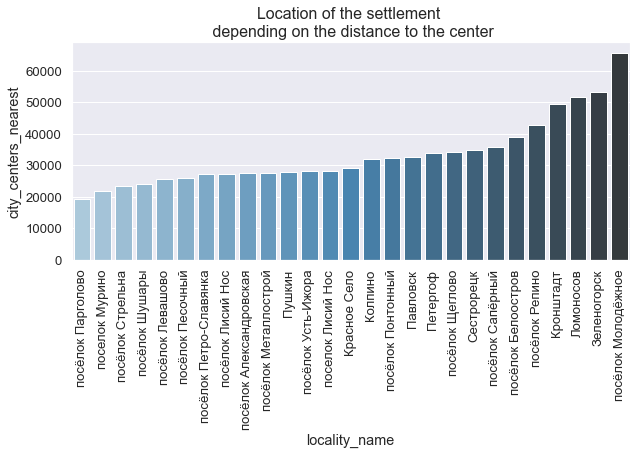

In [27]:
ax = plt.subplots(figsize=(10, 4))
plt.xticks(rotation=90)
sns.barplot(x=group_by_city_center_nearest.locality_name,
            y=group_by_city_center_nearest.city_centers_nearest,
            data=group_by_city_center_nearest, 
            palette="Blues_d").set_title('Location of the settlement \n depending on the distance to the center', 
                                         fontsize=16);

Settlements where advertisements for the sale of apartments are posted are located within 66 km from the center of St. Petersburg. The greatest distance to the center near the village of Molodezhnoye is 65764 km, the smallest one is near the village of Pargolovo - 19311 km.

**Conclusion:**

The gaps are filled. You can start processing data types.

### Replacing the data type

For further possibility of working with data in the `first_day_exposition` column, we will replace the data type with the `datetime` format:

In [28]:
sale_real_estate['first_day_exposition'] = pd.to_datetime(
    sale_real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [29]:
sale_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23699 non-null  int64         
 1   last_price             23699 non-null  float64       
 2   total_area             23699 non-null  float64       
 3   first_day_exposition   23699 non-null  datetime64[ns]
 4   rooms                  23699 non-null  int64         
 5   ceiling_height         14504 non-null  float64       
 6   floors_total           23613 non-null  float64       
 7   living_area            21796 non-null  float64       
 8   floor                  23699 non-null  int64         
 9   is_apartment           23699 non-null  object        
 10  studio                 23699 non-null  bool          
 11  open_plan              23699 non-null  bool          
 12  kitchen_area           23502 non-null  float64       
 13  b

In [30]:
sale_real_estate['first_day_exposition_year'] = sale_real_estate['first_day_exposition'].dt.year
sale_real_estate['first_day_exposition_month'] = sale_real_estate['first_day_exposition'].dt.month

Let's create a column with days of the week where the numbering of days will be from 0 to 6 (Monday...Sunday)

In [31]:
sale_real_estate['first_day_exposition_day'] = sale_real_estate['first_day_exposition'].dt.weekday
sale_real_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_fraction,living_area_fraction,first_day_exposition_year,first_day_exposition_month,first_day_exposition_day
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,1.0,482.0,2.0,755.0,NaN,0.231481,0.472222,2019,3,3
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,0,...,0.0,NaN,0.0,NaN,81.0,0.272277,0.460396,2018,12,1
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,0,...,1.0,90.0,2.0,574.0,558.0,0.148214,0.612500,2015,8,3
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,0,...,2.0,84.0,3.0,234.0,424.0,0.144829,NaN,2015,7,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,2.0,112.0,1.0,48.0,121.0,0.410000,0.320000,2018,6,1
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,0,...,NaN,NaN,NaN,NaN,55.0,0.299342,0.473684,2018,9,0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,0,...,0.0,NaN,0.0,NaN,155.0,0.386059,0.284182,2017,11,3
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,0,...,0.0,NaN,0.0,NaN,NaN,0.263966,NaN,2019,4,3
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,0,...,NaN,NaN,NaN,NaN,189.0,0.265682,0.465320,2018,5,2
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,0,...,0.0,NaN,0.0,NaN,289.0,0.106557,0.714754,2017,2,6


Let's replace the floating data type with an integer one where possible. This will allow you to use fewer resources in the calculations and take up less memory.

In [32]:
sale_real_estate['last_price'] = sale_real_estate['last_price'].astype(int)
sale_real_estate['total_area'] = sale_real_estate['total_area'].astype(int)
sale_real_estate['floors_total'] = sale_real_estate['floors_total'].dropna().astype(int)

In [33]:
sale_real_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_fraction,living_area_fraction,first_day_exposition_year,first_day_exposition_month,first_day_exposition_day
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.00,8,0,...,1.0,482.0,2.0,755.0,NaN,0.231481,0.472222,2019,3,3
1,7,3350000,40,2018-12-04,1,NaN,11.0,18.60,1,0,...,0.0,NaN,0.0,NaN,81.0,0.272277,0.460396,2018,12,1
2,10,5196000,56,2015-08-20,2,NaN,5.0,34.30,4,0,...,1.0,90.0,2.0,574.0,558.0,0.148214,0.612500,2015,8,3
3,0,64900000,159,2015-07-24,3,NaN,14.0,NaN,9,0,...,2.0,84.0,3.0,234.0,424.0,0.144829,NaN,2015,7,4
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.00,13,0,...,2.0,112.0,1.0,48.0,121.0,0.410000,0.320000,2018,6,1
5,10,2890000,30,2018-09-10,1,NaN,12.0,14.40,5,0,...,NaN,NaN,NaN,NaN,55.0,0.299342,0.473684,2018,9,0
6,6,3700000,37,2017-11-02,1,NaN,26.0,10.60,6,0,...,0.0,NaN,0.0,NaN,155.0,0.386059,0.284182,2017,11,3
7,5,7915000,71,2019-04-18,2,NaN,24.0,NaN,22,0,...,0.0,NaN,0.0,NaN,NaN,0.263966,NaN,2019,4,3
8,20,2900000,33,2018-05-23,1,NaN,27.0,15.43,26,0,...,NaN,NaN,NaN,NaN,189.0,0.265682,0.465320,2018,5,2
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.60,7,0,...,0.0,NaN,0.0,NaN,289.0,0.106557,0.714754,2017,2,6


In [34]:
sale_real_estate['living_area_fraction'] = np.floor(
    pd.to_numeric(sale_real_estate['living_area_fraction'], errors='coerce')).astype('Int64')

## Calculation of additional features

### Price per square meter for each apartment:

In [35]:
sale_real_estate['square_meter_price'] = (
    sale_real_estate['last_price'] / sale_real_estate['total_area']).astype(int)

To be able to further analyze the data on the `floor` column, we categorize the data in this column into 3 three categories.

Let's write a function for this:

In [36]:
def cat_floor(value1, value2):
    if value1 == 1:
        return 'первый'
    elif value1 == value2:
        return 'последний'
    else:
        return 'другой'

In [37]:
sale_real_estate['cat_floor'] = sale_real_estate.apply(
    lambda row: cat_floor(row['floor'], row['floors_total']), axis=1) 

In [38]:
sale_real_estate['cat_floor'].value_counts()

другой       17446
последний     3336
первый        2917
Name: cat_floor, dtype: int64

### The ratio of residential and total area:

In [39]:
sale_real_estate['living_general_ratio_area'] = round(
    (sale_real_estate['living_area'] / sale_real_estate['total_area']), 2)

### The ratio of the kitchen area to the total area:

In [40]:
sale_real_estate['kitchen_general_ratio_area'] = round(
    (sale_real_estate['kitchen_area'] / sale_real_estate['total_area']), 2)

In [41]:
sale_real_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,kitchen_area_fraction,living_area_fraction,first_day_exposition_year,first_day_exposition_month,first_day_exposition_day,square_meter_price,cat_floor,living_general_ratio_area,kitchen_general_ratio_area
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.00,8,0,...,NaN,0.231481,0,2019,3,3,120370,другой,0.47,0.23
1,7,3350000,40,2018-12-04,1,NaN,11.0,18.60,1,0,...,81.0,0.272277,0,2018,12,1,83750,первый,0.46,0.28
2,10,5196000,56,2015-08-20,2,NaN,5.0,34.30,4,0,...,558.0,0.148214,0,2015,8,3,92785,другой,0.61,0.15
3,0,64900000,159,2015-07-24,3,NaN,14.0,NaN,9,0,...,424.0,0.144829,<NA>,2015,7,4,408176,другой,NaN,0.14
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.00,13,0,...,121.0,0.410000,0,2018,6,1,100000,другой,0.32,0.41
5,10,2890000,30,2018-09-10,1,NaN,12.0,14.40,5,0,...,55.0,0.299342,0,2018,9,0,96333,другой,0.48,0.30
6,6,3700000,37,2017-11-02,1,NaN,26.0,10.60,6,0,...,155.0,0.386059,0,2017,11,3,100000,другой,0.29,0.39
7,5,7915000,71,2019-04-18,2,NaN,24.0,NaN,22,0,...,NaN,0.263966,<NA>,2019,4,3,111478,другой,NaN,0.27
8,20,2900000,33,2018-05-23,1,NaN,27.0,15.43,26,0,...,189.0,0.265682,0,2018,5,2,87878,другой,0.47,0.27
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.60,7,0,...,289.0,0.106557,0,2017,2,6,88524,другой,0.71,0.11


## Exploratory data analysis

Посторим гистограммы площади, цены, комнат и высоты потолков:

### Area histogram

In [42]:
def hist_func(title, df_col, bins, range_, figsize):
    plt.xlabel('Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(title, fontsize=16)
    df_col.plot(kind='hist', bins=bins, range=range_, figsize=figsize);

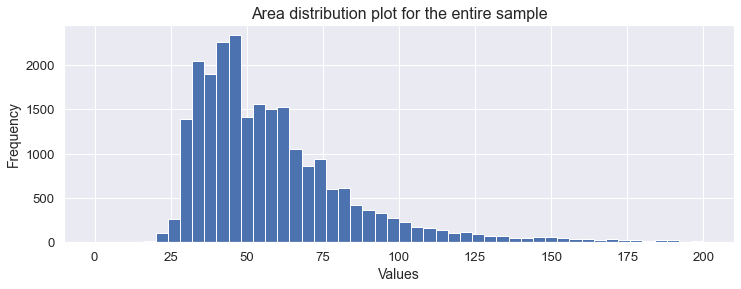

In [43]:
hist_func(title='Area distribution plot for the entire sample', 
          df_col=sale_real_estate['total_area'],
          bins=50, 
          range_=(0, 200), 
          figsize=(12, 4))

In [44]:
sale_real_estate['total_area'].describe().to_frame()

,total_area
count,23699.000000
mean,60.120511
std,35.665822
min,12.000000
25%,40.000000
50%,52.000000
75%,69.000000
max,900.000000


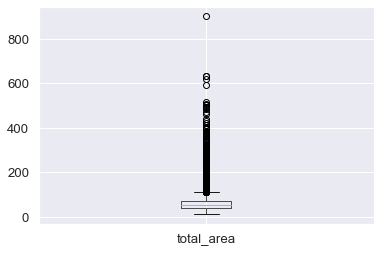

In [45]:
sale_real_estate.boxplot('total_area');

Let's remove the outliers so that they do not distort the statistics in the future:

In [46]:
sale_real_estate = sale_real_estate.query('30 < total_area < 400')

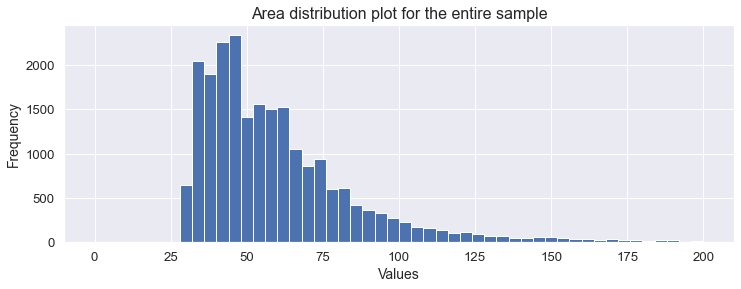

In [47]:
hist_func(title='Area distribution plot for the entire sample', 
          df_col=sale_real_estate['total_area'],
          bins=50, 
          range_=(0, 200), 
          figsize=(12, 4))

It can be seen from the histogram that the most frequent apartments have an area of 53m2. These are mostly two-room apartments.

### Price histogram

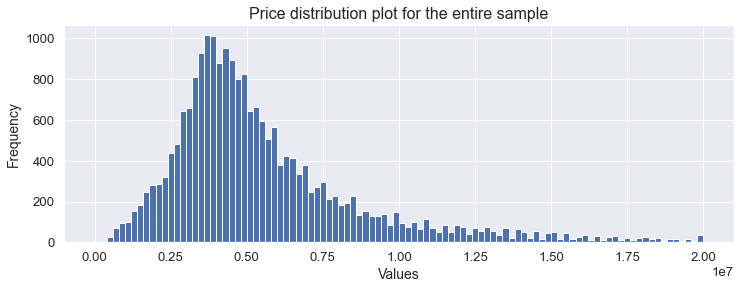

In [48]:
hist_func(title='Price distribution plot for the entire sample', 
          df_col=sale_real_estate['last_price'],
          bins=100, 
          range_=(0, 20000000), 
          figsize=(12, 4))

In [49]:
sale_real_estate['last_price'].describe().to_frame()

,last_price
count,2.253400e+04
mean,6.572250e+06
std,8.373406e+06
min,1.219000e+04
25%,3.564000e+06
50%,4.798500e+06
75%,6.908451e+06
max,3.300000e+08


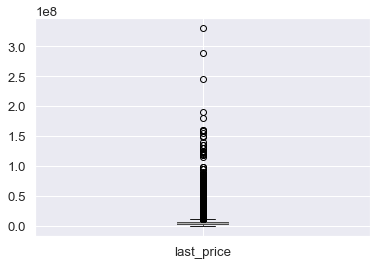

In [50]:
sale_real_estate.boxplot('last_price');

Also get rid of outliers here:

In [51]:
sale_real_estate = sale_real_estate.query('300000 < last_price < 60000000')

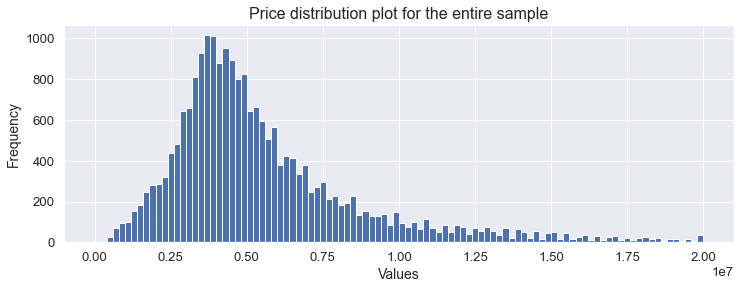

In [52]:
hist_func(title='Price distribution plot for the entire sample', 
          df_col=sale_real_estate['last_price'],
          bins=100, 
          range_=(0, 20000000), 
          figsize=(12, 4))

In [53]:
sale_real_estate['last_price'].describe().to_frame()

,last_price
count,2.244800e+04
mean,6.217086e+06
std,5.300834e+06
min,4.300000e+05
25%,3.550000e+06
50%,4.775000e+06
75%,6.900000e+06
max,5.991412e+07


The most common price is 4.7 million. After the price of 10 million ads, it becomes many times less.

### Gistogramma kolichestva komnat

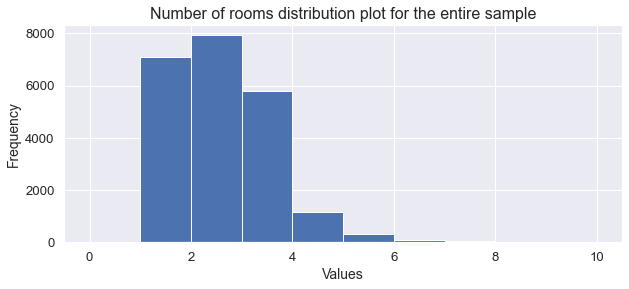

In [54]:
hist_func(title='Number of rooms distribution plot for the entire sample', 
          df_col=sale_real_estate['rooms'],
          bins=10, 
          range_=(0, 10), 
          figsize=(10, 4))

In [55]:
sale_real_estate['rooms'].describe().to_frame()

,rooms
count,22448.000000
mean,2.118719
std,1.043420
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


There are practically no rooms more than 8 in the ads. Filter ads by the number of rooms:

In [56]:
sale_real_estate = sale_real_estate.query('rooms < 8')

The most frequent among the ads are one-room and two-room apartments. They are approximately equal. At the beginning of the scale there is a small bar near zero. Most likely it reflects the number of studio apartments. 5-room apartments are already quite rare in the sample.

### Ceiling height histogram

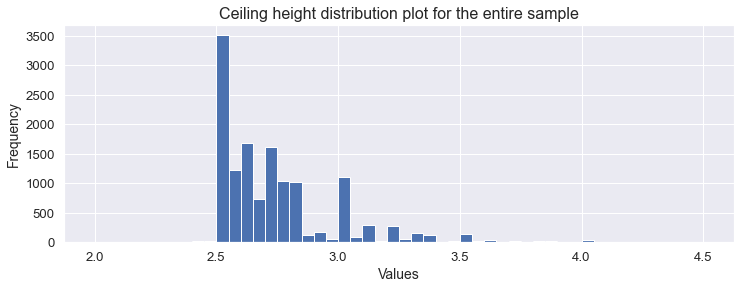

In [57]:
hist_func(title='Ceiling height distribution plot for the entire sample', 
          df_col=sale_real_estate['ceiling_height'],
          bins=50, 
          range_=(2, 4.5), 
          figsize=(12, 4))

In [58]:
sale_real_estate['ceiling_height'].describe()

count    13781.000000
mean         2.763423
std          0.949855
min          1.000000
25%          2.530000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

The height of the ceilings in the advertisements starts from two meters. There are only a few such announcements. The main share accounts for ceilings 2.5 meters high. More than 3 meters ads are no longer so common.

Filter ads by ceiling height:

In [59]:
sale_real_estate = sale_real_estate.query('2.2 <ceiling_height < 4')

### Histogram of apartment sale time

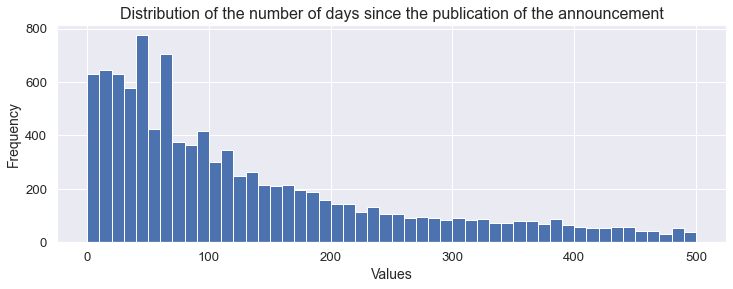

In [60]:
hist_func(title='Distribution of the number of days since the publication of the announcement', 
          df_col=sale_real_estate['days_exposition'],
          bins=50, 
          range_=(0, 500), 
          figsize=(12, 4))

The histogram has peaks around 50, 70, 100 days. On the other hand, ads that are less than these values are sold suspiciously quickly. In just a few days. Buying an apartment is a responsible and difficult task. People need to compare a lot of options and make an informed decision.

In [61]:
sale_real_estate['days_exposition'].describe().to_frame()

,days_exposition
count,11343.000000
mean,191.304593
std,229.282452
min,1.000000
25%,45.000000
50%,104.000000
75%,249.000000
max,1580.000000


Let's build a range chart to understand the characteristic spread of values across quartiles.

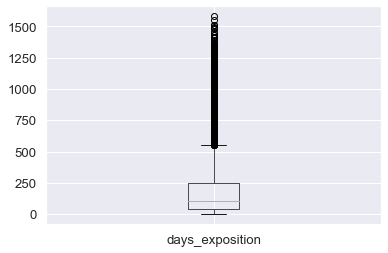

In [62]:
sale_real_estate.boxplot('days_exposition');

Let's calculate the mean and median.

In [63]:
sale_real_estate['days_exposition'].mean()

191.30459314114432

In [64]:
sale_real_estate['days_exposition'].median()

104.0

The mean is almost twice the median. This indicates a too long tail of high values.

Median value 104 days. That is, the sale usually takes about 104 days from the date of publication of the announcement.

We will remove suspicious ads. It can be seen from the histogram that values over 800 are already quite rare. Let's take the upper limit of 800 days.

In [65]:
sale_real_estate = sale_real_estate.query(('days_exposition < 800'))

In [66]:
sale_real_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,kitchen_area_fraction,living_area_fraction,first_day_exposition_year,first_day_exposition_month,first_day_exposition_day,square_meter_price,cat_floor,living_general_ratio_area,kitchen_general_ratio_area
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,0,...,121.0,0.410000,0,2018,6,1,100000,другой,0.32,0.41
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.6,7,0,...,289.0,0.106557,0,2017,2,6,88524,другой,0.71,0.11
10,5,5050000,39,2017-11-16,1,2.67,12.0,20.3,3,0,...,137.0,0.214646,0,2017,11,3,129487,другой,0.52,0.22
13,20,3550000,42,2017-07-01,2,2.56,5.0,27.0,5,0,...,366.0,0.121495,0,2017,7,5,84523,последний,0.64,0.12
16,11,6700000,82,2017-11-23,3,3.05,5.0,55.6,1,0,...,397.0,0.109756,0,2017,11,3,81707,первый,0.68,0.11
18,8,3250000,31,2017-01-27,1,2.50,5.0,19.4,2,0,...,168.0,0.180645,0,2017,1,4,104838,другой,0.63,0.18
19,16,14200000,121,2019-01-09,3,2.75,16.0,76.0,8,0,...,97.0,0.099174,0,2019,1,2,117355,другой,0.63,0.10
20,12,6120000,80,2017-09-28,3,2.70,27.0,48.0,11,0,...,74.0,0.150000,0,2017,9,3,76500,другой,0.60,0.15
22,20,5000000,58,2017-04-24,2,2.75,25.0,30.0,15,0,...,60.0,0.189655,0,2017,4,0,86206,другой,0.52,0.19
23,11,2950000,32,2016-10-29,1,2.60,9.0,17.7,9,0,...,615.0,0.190625,0,2016,10,5,92187,последний,0.55,0.19


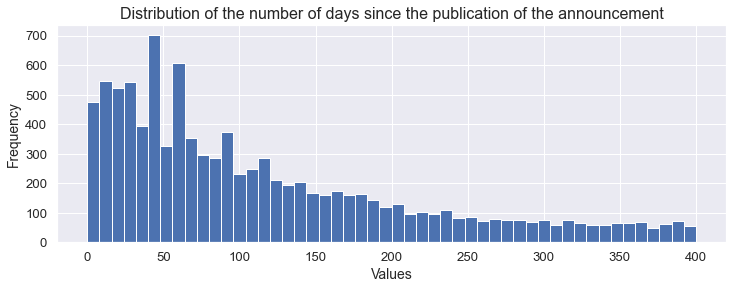

In [67]:
hist_func(title='Distribution of the number of days since the publication of the announcement', 
          df_col=sale_real_estate['days_exposition'],
          bins=50, 
          range_=(0, 400), 
          figsize=(12, 4))

In [68]:
sale_real_estate['days_exposition'].mean()

163.15515670553935

In [69]:
sale_real_estate['days_exposition'].median()

98.0

The mean is slightly closer to the median, but the gap is still large. The effect of emissions is shown.

### Scatterplot matrix over the entire sample

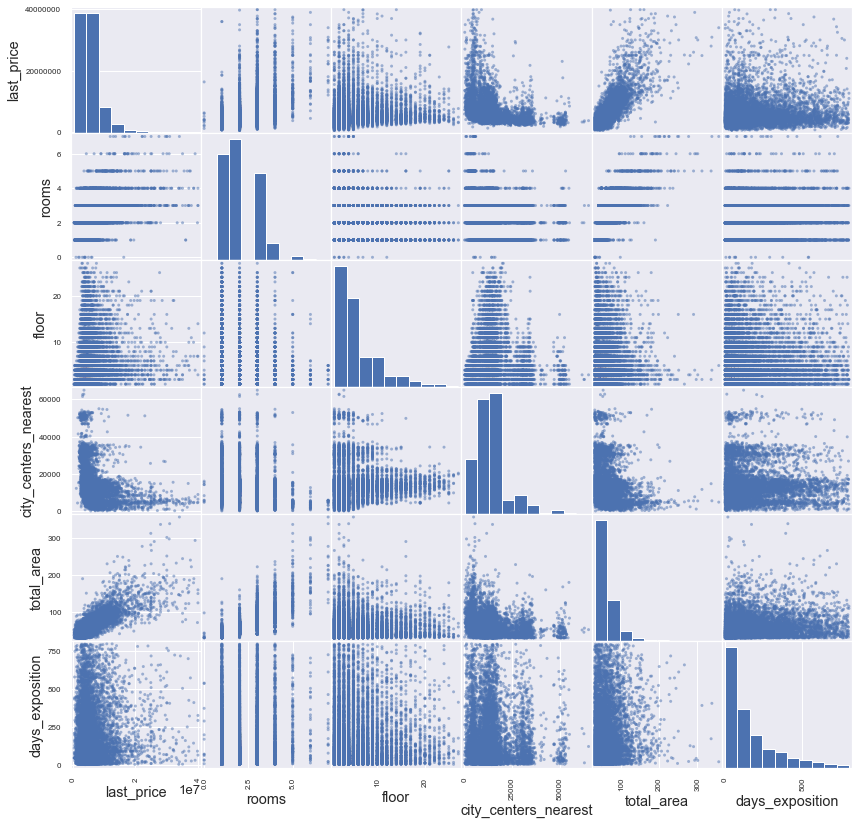

In [70]:
pd.plotting.scatter_matrix(sale_real_estate.query('last_price<40000000')[['last_price',
                                                                          'rooms',
                                                                          'floor',
                                                                          'city_centers_nearest',
                                                                          'total_area',
                                                                          'days_exposition']], figsize=(14, 14)); 

Based on the scattering matrix, we can say that with an increase in the area, the price also increases, but tends to expand the spread of values.

It also confirms at first glance the obvious thing that with a decrease in the distance to the center, the price will increase.

An interesting situation is observed with the increase in the number of storeys. The higher the floor, the lower the price. There is an exception for the first floor. There the price is lower than on the other floors.

By the number of rooms, the most expensive apartments are 3, 4, 5, 6-room apartments.

The fastest selling apartments are on the upper floors, closest to the center and with a larger area. By the number of rooms, these are mainly one-room, two-room and three-room apartments. You can also see the price drop over time.

In [71]:
sale_real_estate[['last_price', 'city_centers_nearest', 'total_area']].corr()

,last_price,city_centers_nearest,total_area
last_price,1.000000,-0.323138,0.775749
city_centers_nearest,-0.323138,1.000000,-0.236979
total_area,0.775749,-0.236979,1.000000


Pearson's ratio illustrates well the high correlation between area and price. There is a weak relationship between price increases and proximity to the center. There is also a very weak relationship between the increase in area as one approaches the center.

### Dependence of the price on the category of the floor (first or last)

In [72]:
def featute_stat(df, index, values, aggfunc, figsize, fontsize_title, title):
    pivot_df = df.pivot_table(index = index,
                      values = values,
                      aggfunc = aggfunc).reset_index()
    ax = plt.subplots(figsize=figsize)
    sns.barplot(x=pivot_df[index],
                y=pivot_df[values],
                data=pivot_df,
                palette="Blues_d"
               ).set_title(title, fontsize=fontsize_title);

In [73]:
sale_real_estate_query=sale_real_estate.query('cat_floor!="другой"' and 'last_price<100000000')

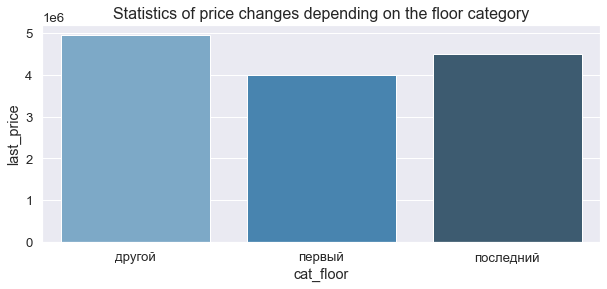

In [74]:
featute_stat(df=sale_real_estate_query, 
             index='cat_floor',
             values='last_price',
             aggfunc='median',
             figsize=(10, 4), 
             fontsize_title=16,
             title='Statistics of price changes depending on the floor category')

Housing on the ground floor is the cheapest.

### Dependence of the price on the date publication

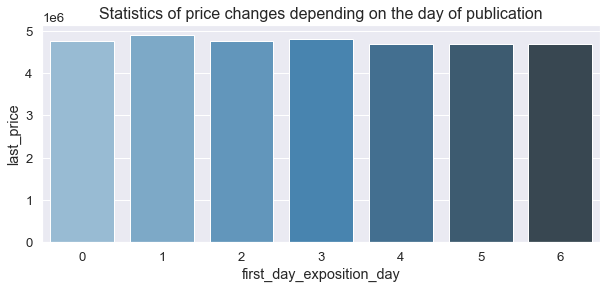

In [75]:
featute_stat(df=sale_real_estate, 
             index='first_day_exposition_day',
             values='last_price',
             aggfunc='median',
             figsize=(10, 4), 
             fontsize_title=16,
             title='Statistics of price changes depending on the day of publication')

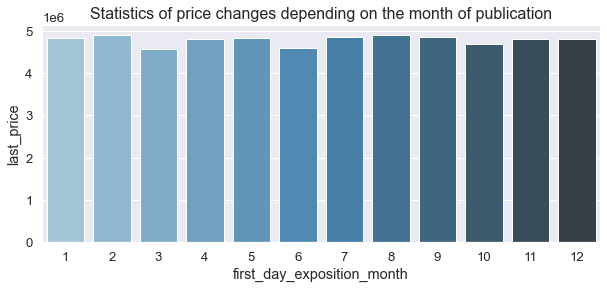

In [76]:
featute_stat(df=sale_real_estate, 
             index='first_day_exposition_month',
             values='last_price',
             aggfunc='median',
             figsize=(10, 4), 
             fontsize_title=16,
             title='Statistics of price changes depending on the month of publication')

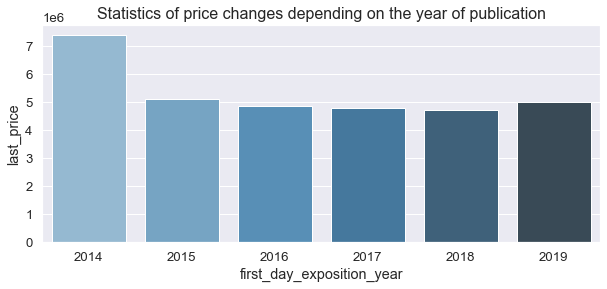

In [77]:
featute_stat(df=sale_real_estate, 
             index='first_day_exposition_year',
             values='last_price',
             aggfunc='median',
             figsize=(10, 4), 
             fontsize_title=16,
             title='Statistics of price changes depending on the year of publication')

There is already a dependency here. Over time, the price drops.

### Top 10 settlements with the maximum number of ads

In [78]:
sale_real_estate.groupby('locality_name')['square_meter_price'].agg(['count', 'median']).sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,7667,103225.0
Всеволожск,208,65337.0
посёлок Шушары,179,76666.0
посёлок Мурино,177,85714.0
Колпино,168,72413.0
Пушкин,161,97500.0
посёлок Парголово,116,91314.5
Гатчина,115,69354.0
Петергоф,113,80769.0


The most expensive housing in St. Petersburg - 103225r / m2. The cheapest in the village of Kudrovo - 90243r / m2

### St. Petersburg statistics

Let's filter ads by the city of St. Petersburg:

In [79]:
sale_real_estate_saint_petersberg = sale_real_estate.query('locality_name=="Санкт-Петербург"')

In [80]:
sale_real_estate_saint_petersberg.isna().sum().to_frame().style.background_gradient('cool')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,0
floors_total,4
living_area,408
floor,0
is_apartment,0


Remove gaps where possible:

In [81]:
sale_real_estate_saint_petersberg = sale_real_estate_saint_petersberg.dropna(
    subset=['airports_nearest', 'city_centers_nearest', 'parks_around3000', 'ponds_around3000'])

Selection column with the distance in km to the center:

In [82]:
sale_real_estate_saint_petersberg['city_centers_nearest_km'] = (
    sale_real_estate_saint_petersberg['city_centers_nearest'] / 1000).astype(int)

Calculation average price per m2 for each kilometer:

In [83]:
sale_real_estate_saint_petersberg_pivot = sale_real_estate_saint_petersberg.pivot_table(
                                                                        index='city_centers_nearest_km',
                                                                        values='square_meter_price',
                                                                        aggfunc='median').reset_index()

sale_real_estate_saint_petersberg_pivot.columns=['city_centers_nearest_km', 'median_square_meter_price']

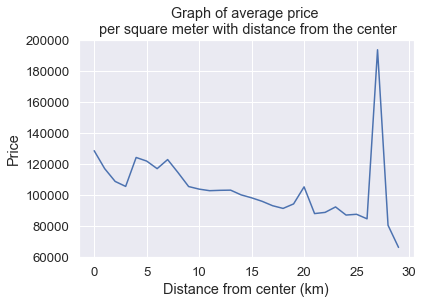

In [84]:
plt.title('Graph of average price \n per square meter with distance from the center')
plt.xlabel('Distance from center (km)')
plt.ylabel('Price')
sale_real_estate_saint_petersberg_pivot['median_square_meter_price'].plot();

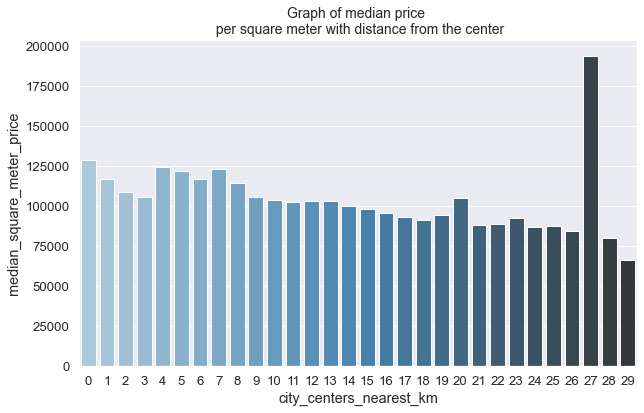

In [85]:
featute_stat(sale_real_estate_saint_petersberg_pivot, 
             'city_centers_nearest_km', 
             'median_square_meter_price', 
             'mean', 
             (10, 6), 
              14, 
             'Graph of median price \n per square meter with distance from the center')

In both graphs, there is an outlier in the region of 27 kilometers from the center. For ease of analysis, it should be filtered. The mean and median average the price, as a result, it is difficult to see the border of the center on such a chart.

In [86]:
sale_real_estate_saint_petersberg.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_fraction,living_area_fraction,first_day_exposition_year,first_day_exposition_month,first_day_exposition_day,square_meter_price,cat_floor,living_general_ratio_area,kitchen_general_ratio_area,city_centers_nearest_km
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,0,...,0.410000,0,2018,6,1,100000,другой,0.32,0.41,8
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.6,7,0,...,0.106557,0,2017,2,6,88524,другой,0.71,0.11,15
10,5,5050000,39,2017-11-16,1,2.67,12.0,20.3,3,0,...,0.214646,0,2017,11,3,129487,другой,0.52,0.22,13
16,11,6700000,82,2017-11-23,3,3.05,5.0,55.6,1,0,...,0.109756,0,2017,11,3,81707,первый,0.68,0.11,10
18,8,3250000,31,2017-01-27,1,2.50,5.0,19.4,2,0,...,0.180645,0,2017,1,4,104838,другой,0.63,0.18,10


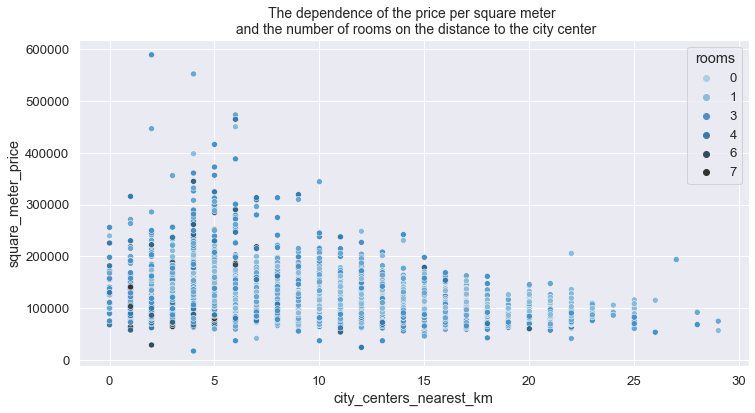

In [87]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=sale_real_estate_saint_petersberg.query('last_price < 100000000'),
    x='city_centers_nearest_km', 
    y='square_meter_price',
    palette="Blues_d",
    hue='rooms').set_title('The dependence of the price per square meter \n and the number of rooms on the distance to the city center', fontsize=14);

In this graph, the boundary is more obvious. It is 10 kilometers from the center. Further, a sharp decline in housing prices is noticeable. Closer to the center, the number of 6, 7-room apartments increases dramatically.

### Research in the center of St. Petersburg

In [88]:
saint_petersberg_center = sale_real_estate_saint_petersberg.query('city_centers_nearest_km < 9')

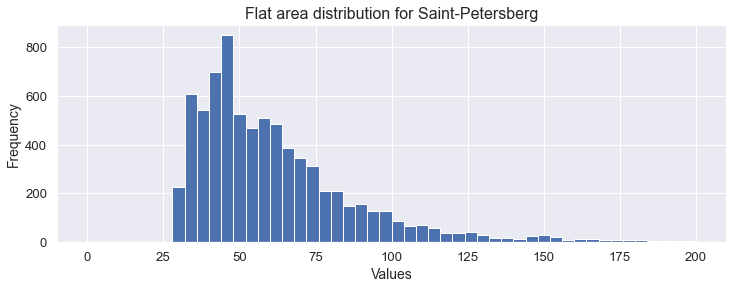

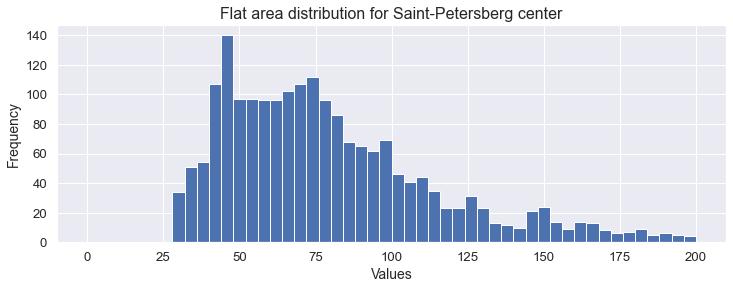

In [89]:
hist_func(title='Flat area distribution for Saint-Petersberg', 
          df_col=sale_real_estate_saint_petersberg['total_area'],
          bins=50, 
          range_=(0, 200), 
          figsize=(12, 4))
plt.show()

hist_func(title='Flat area distribution for Saint-Petersberg center', 
          df_col=saint_petersberg_center['total_area'],
          bins=50, 
          range_=(0, 200), 
          figsize=(12, 4))
plt.show();

In the center of St. Petersburg, the bulk of apartments are from 40 to 100 m2, while throughout the city from 30 to 70. In the center of St. Petersburg, apartments are more spacious.

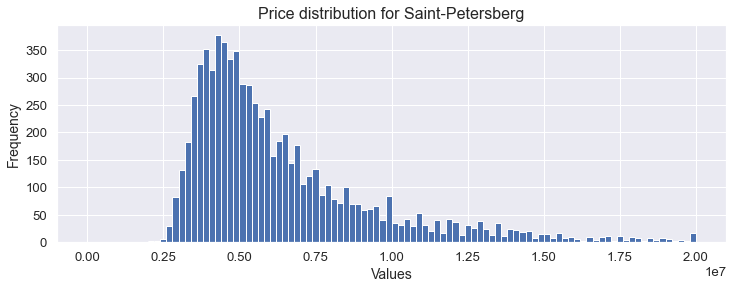

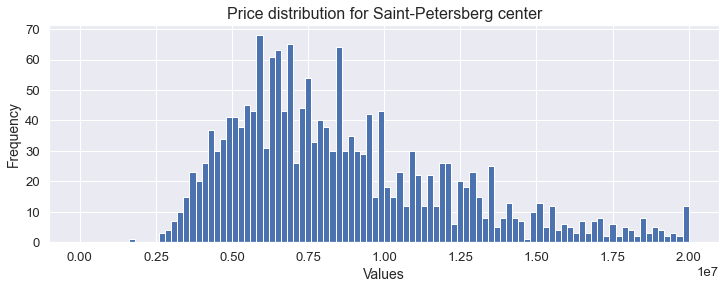

In [90]:
hist_func(title='Price distribution for Saint-Petersberg', 
          df_col=sale_real_estate_saint_petersberg['last_price'],
          bins=100, 
          range_=(0, 20000000), 
          figsize=(12, 4))
plt.show()

hist_func(title='Price distribution for Saint-Petersberg center', 
          df_col=saint_petersberg_center['last_price'],
          bins=100, 
          range_=(0, 20000000), 
          figsize=(12, 4))
plt.show();

In the center of St. Petersburg, the main price range is from 5 to 10 million rubles. Across the sample from 3 to 6.5 million

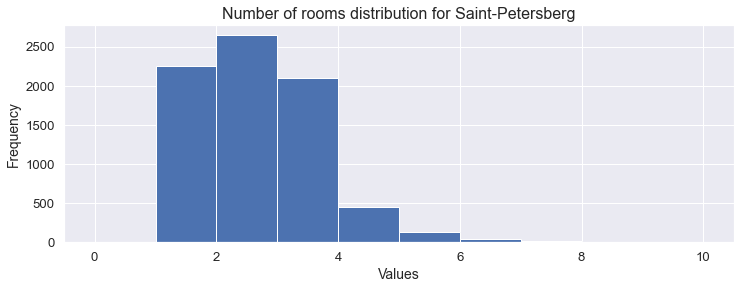

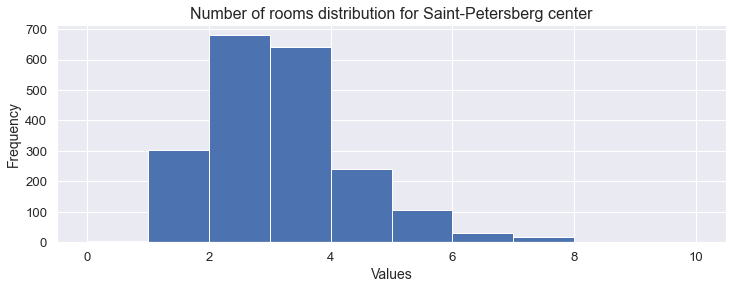

In [91]:
hist_func(title='Number of rooms distribution for Saint-Petersberg', 
          df_col=sale_real_estate_saint_petersberg['rooms'],
          bins=10, 
          range_=(0, 10), 
          figsize=(12, 4))
plt.show()

hist_func(title='Number of rooms distribution for Saint-Petersberg center', 
          df_col=saint_petersberg_center['rooms'],
          bins=10, 
          range_=(0, 10), 
          figsize=(12, 4))
plt.show();

In the center of St. Petersburg, the number of rooms in apartments is greater than throughout the city, which correlates well with the total area of apartments.

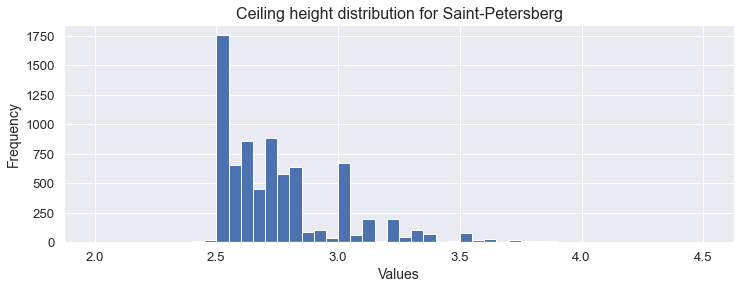

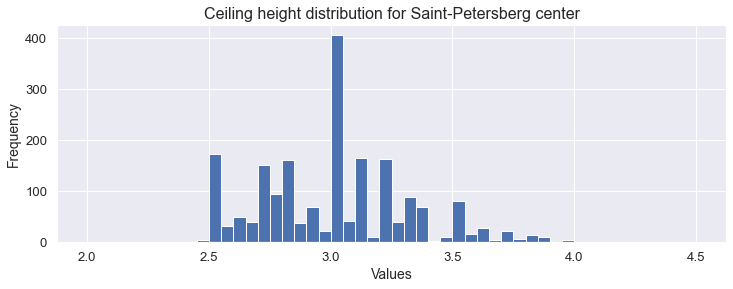

In [92]:
hist_func(title='Ceiling height distribution for Saint-Petersberg', 
          df_col=sale_real_estate_saint_petersberg['ceiling_height'],
          bins=50, 
          range_=(2, 4.5), 
          figsize=(12, 4))
plt.show()

hist_func(title='Ceiling height distribution for Saint-Petersberg center', 
          df_col=saint_petersberg_center['ceiling_height'],
          bins=50, 
          range_=(2, 4.5), 
          figsize=(12, 4))
plt.show();

In [93]:
sale_real_estate_saint_petersberg['ceiling_height'].describe().to_frame()

,ceiling_height
count,7640.000000
mean,2.742135
std,0.258808
min,2.300000
25%,2.550000
50%,2.700000
75%,2.800000
max,3.980000


In [94]:
saint_petersberg_center['ceiling_height'].describe().to_frame()

,ceiling_height
count,2022.000000
mean,2.996627
std,0.314493
min,2.400000
25%,2.750000
50%,3.000000
75%,3.200000
max,3.980000


Throughout the city, the most frequent ceilings are 2.7m high, while in the center 3m. In general, the height of ceilings in the center of St. Petersburg is higher than throughout the city.

### Scatterplot matrix for St. Petersburg

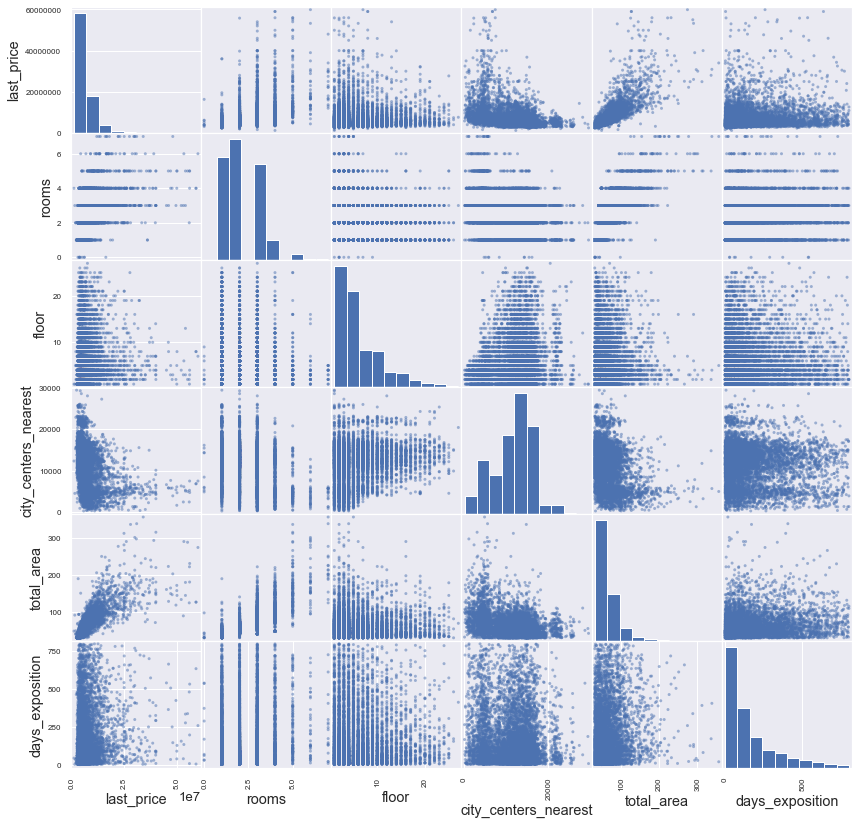

In [95]:
pd.plotting.scatter_matrix(sale_real_estate_saint_petersberg[['last_price',
                                                              'rooms',
                                                              'floor',
                                                              'city_centers_nearest',
                                                              'total_area',
                                                              'days_exposition']], figsize=(14, 14)); 

Table with Pearson's correlation coefficients for St. Petersburg:

In [96]:
sale_real_estate_saint_petersberg[['last_price', 'city_centers_nearest', 'total_area']].corr()

,last_price,city_centers_nearest,total_area
last_price,1.000000,-0.398063,0.794209
city_centers_nearest,-0.398063,1.000000,-0.359626
total_area,0.794209,-0.359626,1.000000


Across the city, there is a strong direct relationship between price and area. Price-distance to the center demonstrates an inverse relationship of medium severity. Area-distance to the center also shows an inverse relationship of average severity.

### Graphs of price changes in St. Petersburg:

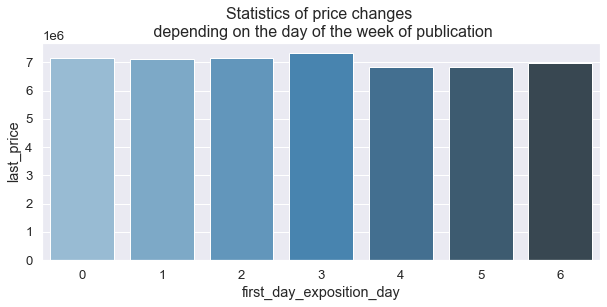

In [97]:
featute_stat(sale_real_estate_saint_petersberg, 
             'first_day_exposition_day', 
             'last_price', 
             'mean', 
             (10, 4), 
              16, 
             'Statistics of price changes \n depending on the day of the week of publication')

Depending on the day the ad is placed, the price practically does not change.

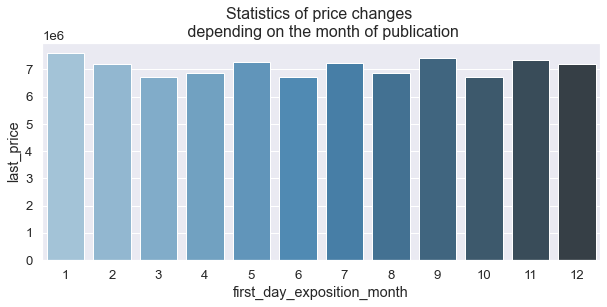

In [98]:
featute_stat(sale_real_estate_saint_petersberg, 
             'first_day_exposition_month', 
             'last_price', 
             'mean', 
             (10, 4), 
              16, 
             'Statistics of price changes \n depending on the month of publication')

The dependence of the price-month of publication on this graph is not traced.

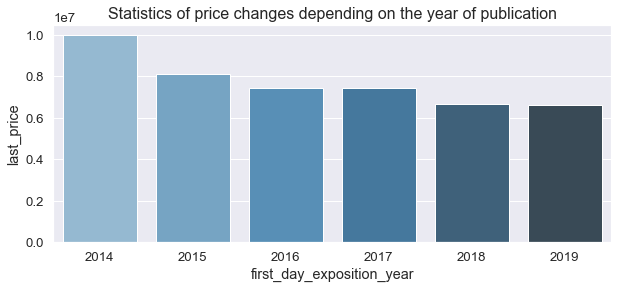

In [99]:
featute_stat(sale_real_estate_saint_petersberg, 
             'first_day_exposition_year', 
             'last_price', 
             'mean', 
             (10, 4), 
              16, 
             'Statistics of price changes depending on the year of publication')

Over time, there has been a decrease in the price of apartments.

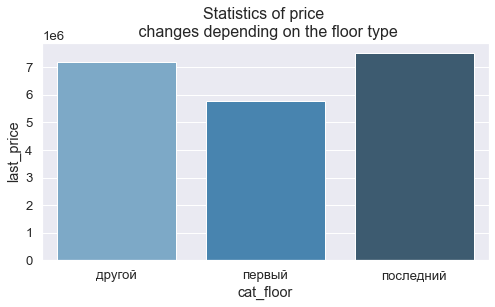

In [100]:
featute_stat(sale_real_estate_saint_petersberg, 
             'cat_floor', 
             'last_price', 
             'mean', 
             (8, 4), 
              16, 
             'Statistics of price \n changes depending on the floor type')

Here, the result is almost the same as for the entire sample. The ground floor apartments are cheaper. The category "other" and "last" are almost equal in price range.

### City center scatterplot matrix:

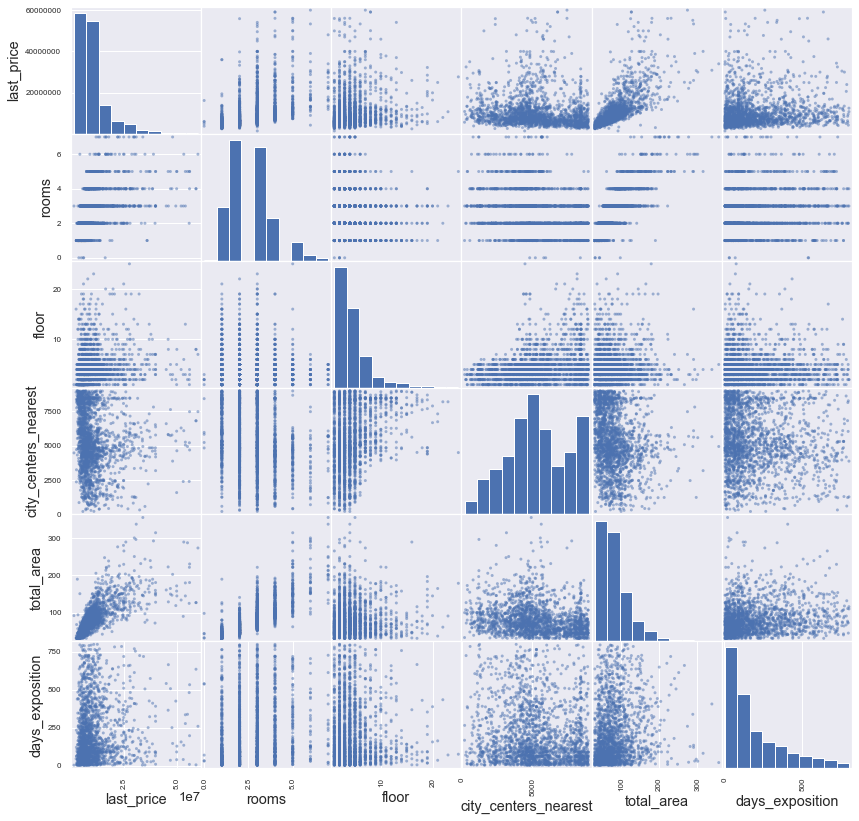

In [101]:
pd.plotting.scatter_matrix(saint_petersberg_center[['last_price', 
                                                    'rooms',
                                                    'floor', 
                                                    'city_centers_nearest',
                                                    'total_area',
                                                    'days_exposition']], figsize=(14, 14));

According to the price-area dependence, the situation is the same as throughout the city. As the area increases, so does the price, but tends to widen the range of values.

Depending on the price-distance to the center, the picture is already slightly different. Closer to the center, housing prices are somewhat reduced.

With an increase in the number of storeys in the center, there is no longer a relationship between higher floor and cheaper housing.

In terms of the number of rooms, the dependence is the same as throughout the city. The most expensive apartments are 3, 4, 5, 6-room apartments.

The fastest selling apartments are on the upper floors, in the area of 3...6 km from the center. The number of rooms and area does not affect the duration of the sale.

Table of Pearson's correlation coefficients for the center of St. Petersburg:

In [102]:
saint_petersberg_center[['last_price', 'city_centers_nearest', 'total_area']].corr()

,last_price,city_centers_nearest,total_area
last_price,1.000000,-0.125929,0.735879
city_centers_nearest,-0.125929,1.000000,-0.214720
total_area,0.735879,-0.214720,1.000000


There is also a strong dependence of the price on the area, but the price-distance to the center dependence is no longer there. There is also a very weak area-distance relationship to the center.

### Graphs of price changes in the center of St. Petersburg:

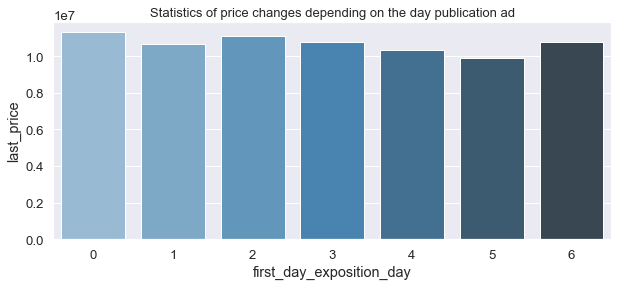

In [103]:
featute_stat(saint_petersberg_center, 
             'first_day_exposition_day', 
             'last_price', 
             'mean', 
             (10, 4), 
              13, 
             'Statistics of price changes depending on the day publication ad')

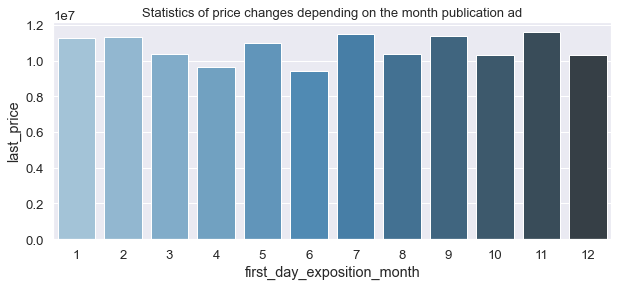

In [104]:
featute_stat(saint_petersberg_center, 
             'first_day_exposition_month', 
             'last_price', 
             'mean', 
             (10, 4), 
              13, 
             'Statistics of price changes depending on the month publication ad')

There is a slight decrease in prices by the summer season.

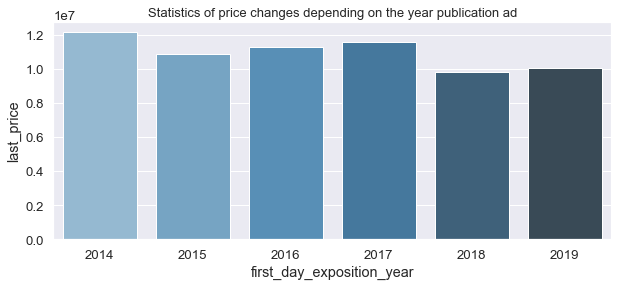

In [105]:
featute_stat(saint_petersberg_center, 
             'first_day_exposition_year', 
             'last_price', 
             'mean', 
             (10, 4), 
              13, 
             'Statistics of price changes depending on the year publication ad')

This chart shows a slight decline in prices over the years.

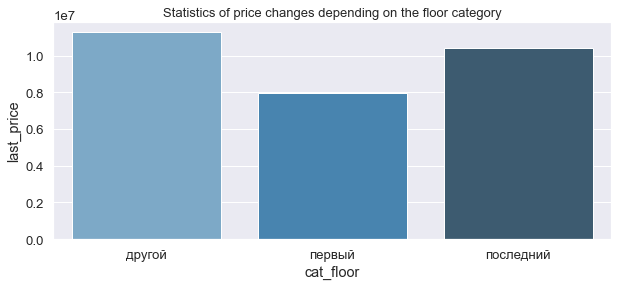

In [106]:
featute_stat(saint_petersberg_center, 
             'cat_floor', 
             'last_price', 
             'mean', 
             (10, 4), 
              13, 
             'Statistics of price changes depending on the floor category')

Compared to the whole city, the price reduction on the first floors in the center looks more noticeable.

For 5 years, the price in the ads in the center has not practically decreased, while its decline is noticeable throughout the city.

## General conclusion

In the course of a study of housing in St. Petersburg and neighboring settlements, a dependence of price growth with approaching the center of St. Petersburg was revealed. The price drops as the number of floors rises, but there are exceptions for the first floor. With the increase in time from the day of publication of the announcement, the cost of apartments decreases. As you move towards the city center, there is a tendency to increase the area and height of the ceilings of apartments. The fastest selling apartments are on the upper floors closest to the center. The border of the central district of St. Petersburg was revealed at 9 km from the center.

For the center of St. Petersburg, the price-distance relationship to the center is already different. Closer to the center, housing prices are somewhat reduced. With an increase in the number of storeys in the center, there is no longer a relationship between higher floor and cheaper housing.
In terms of the number of rooms, the dependence is the same as throughout the city. The most expensive apartments are 3, 4, 5, 6-room apartments. The fastest selling apartments are on the upper floors, in the area of ​​3...6 km from the center. The number of rooms and area does not affect the duration of the sale.

